In [11]:
## inline figures and output
%matplotlib inline
## clear the workspace
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import rand
from scipy.signal import argrelextrema
from matplotlib.collections import LineCollection

from the_useful_library import *
from the_loading_library import *
from the_fitting_library import *
from the_plotting_library import *

k_scale: 7.574488885759363


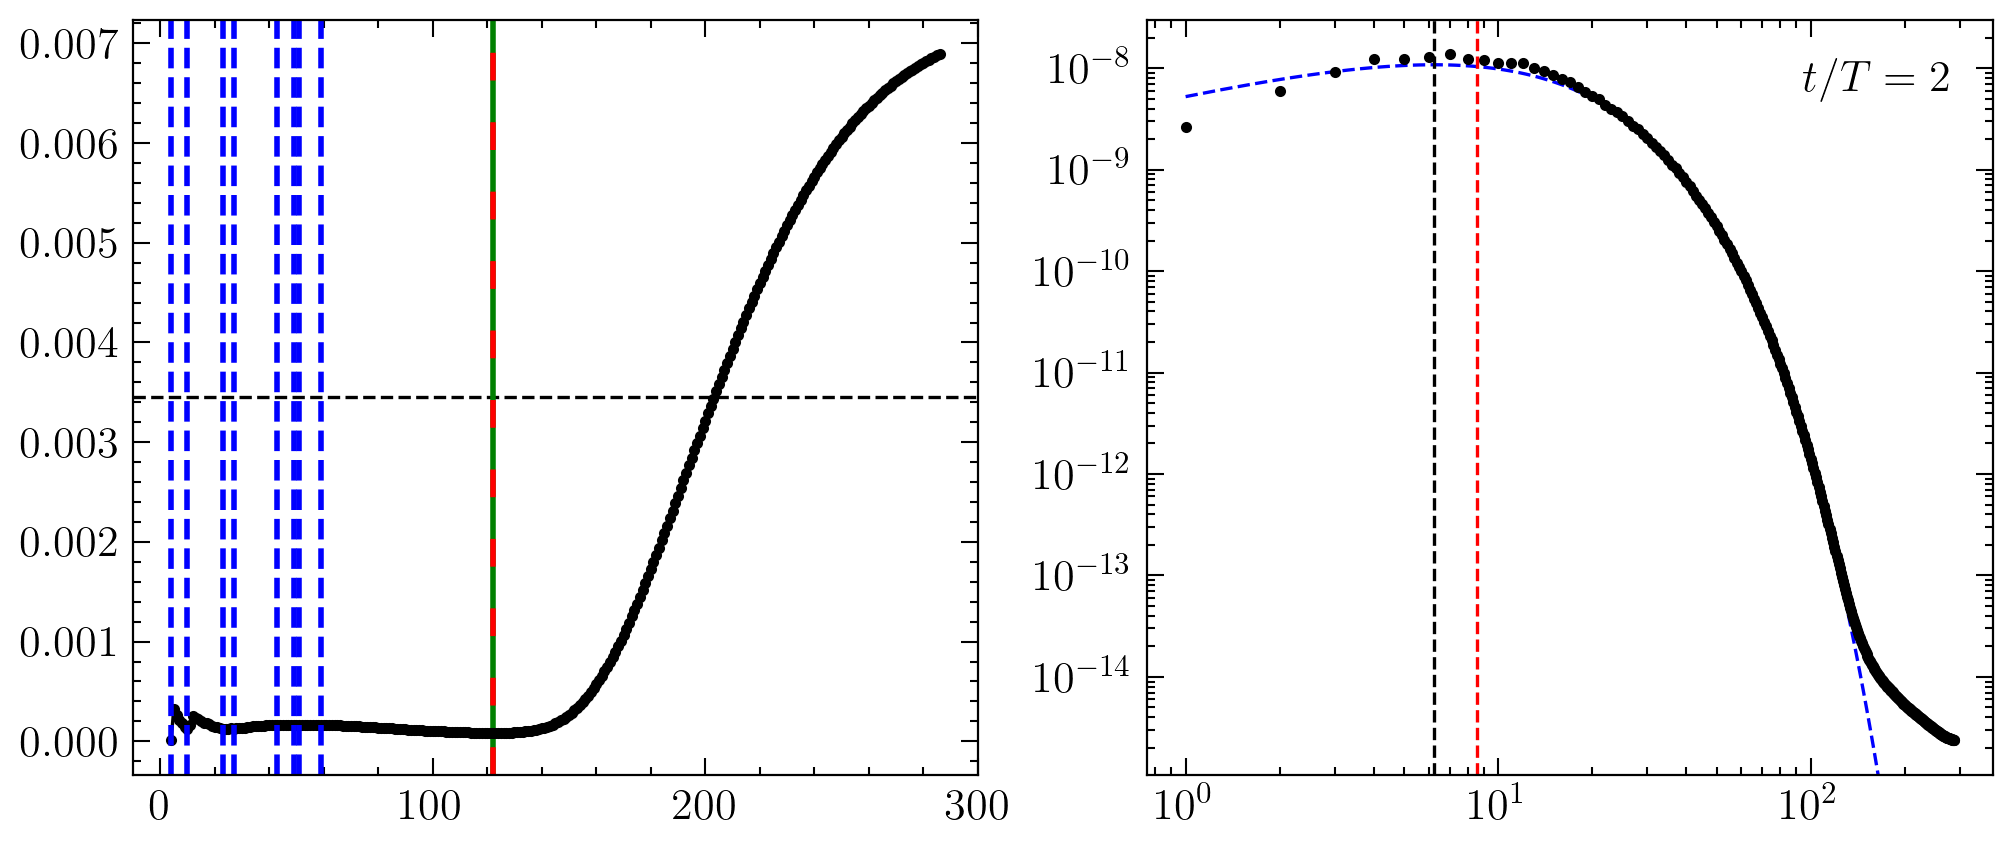

k_scale: 6.49562139685898


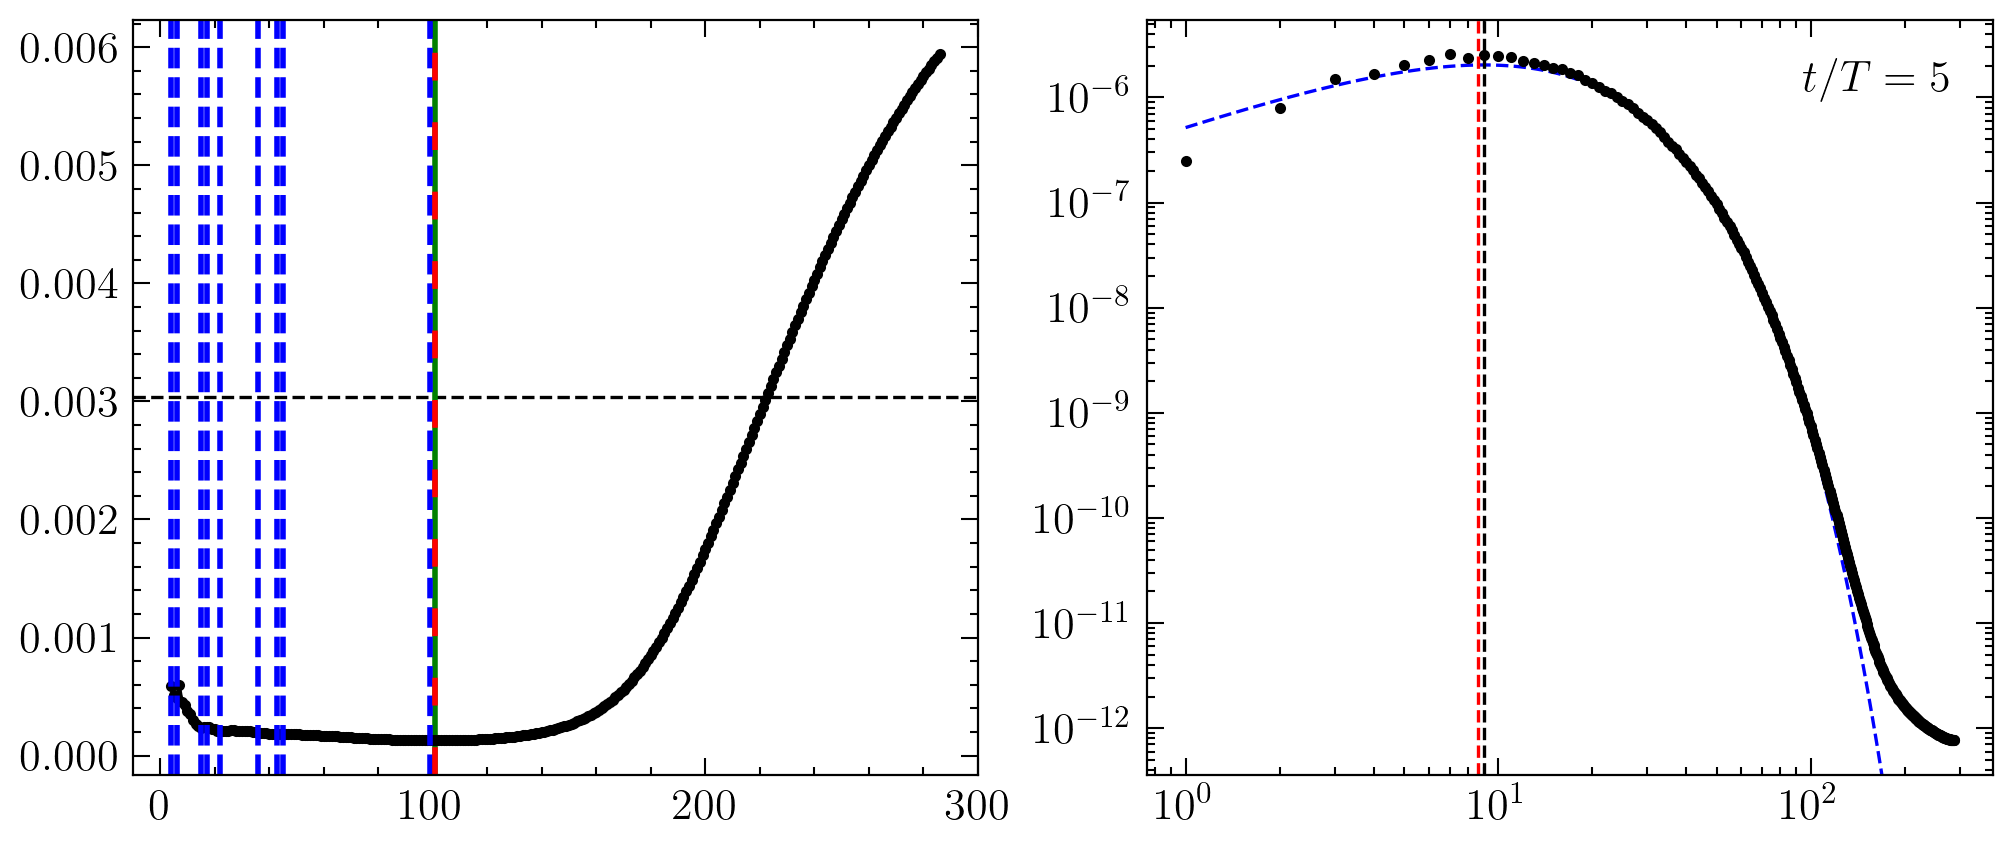

k_scale: 4.287051871934763


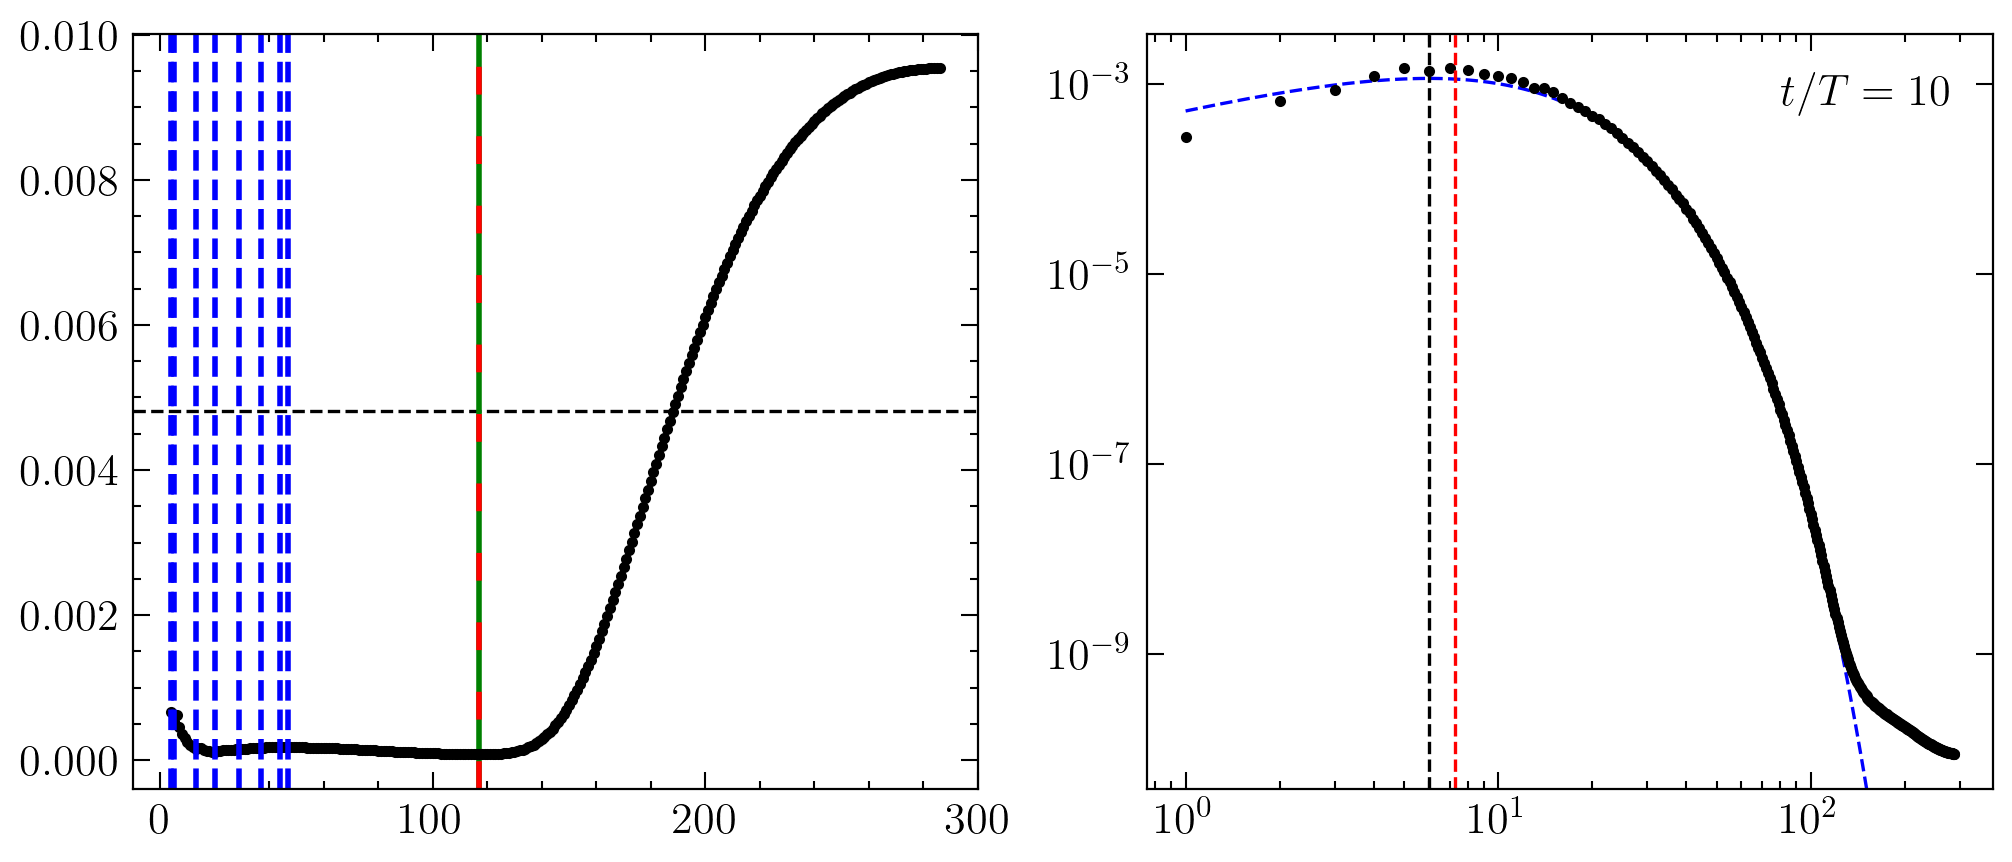

k_scale: 7.199162622021271


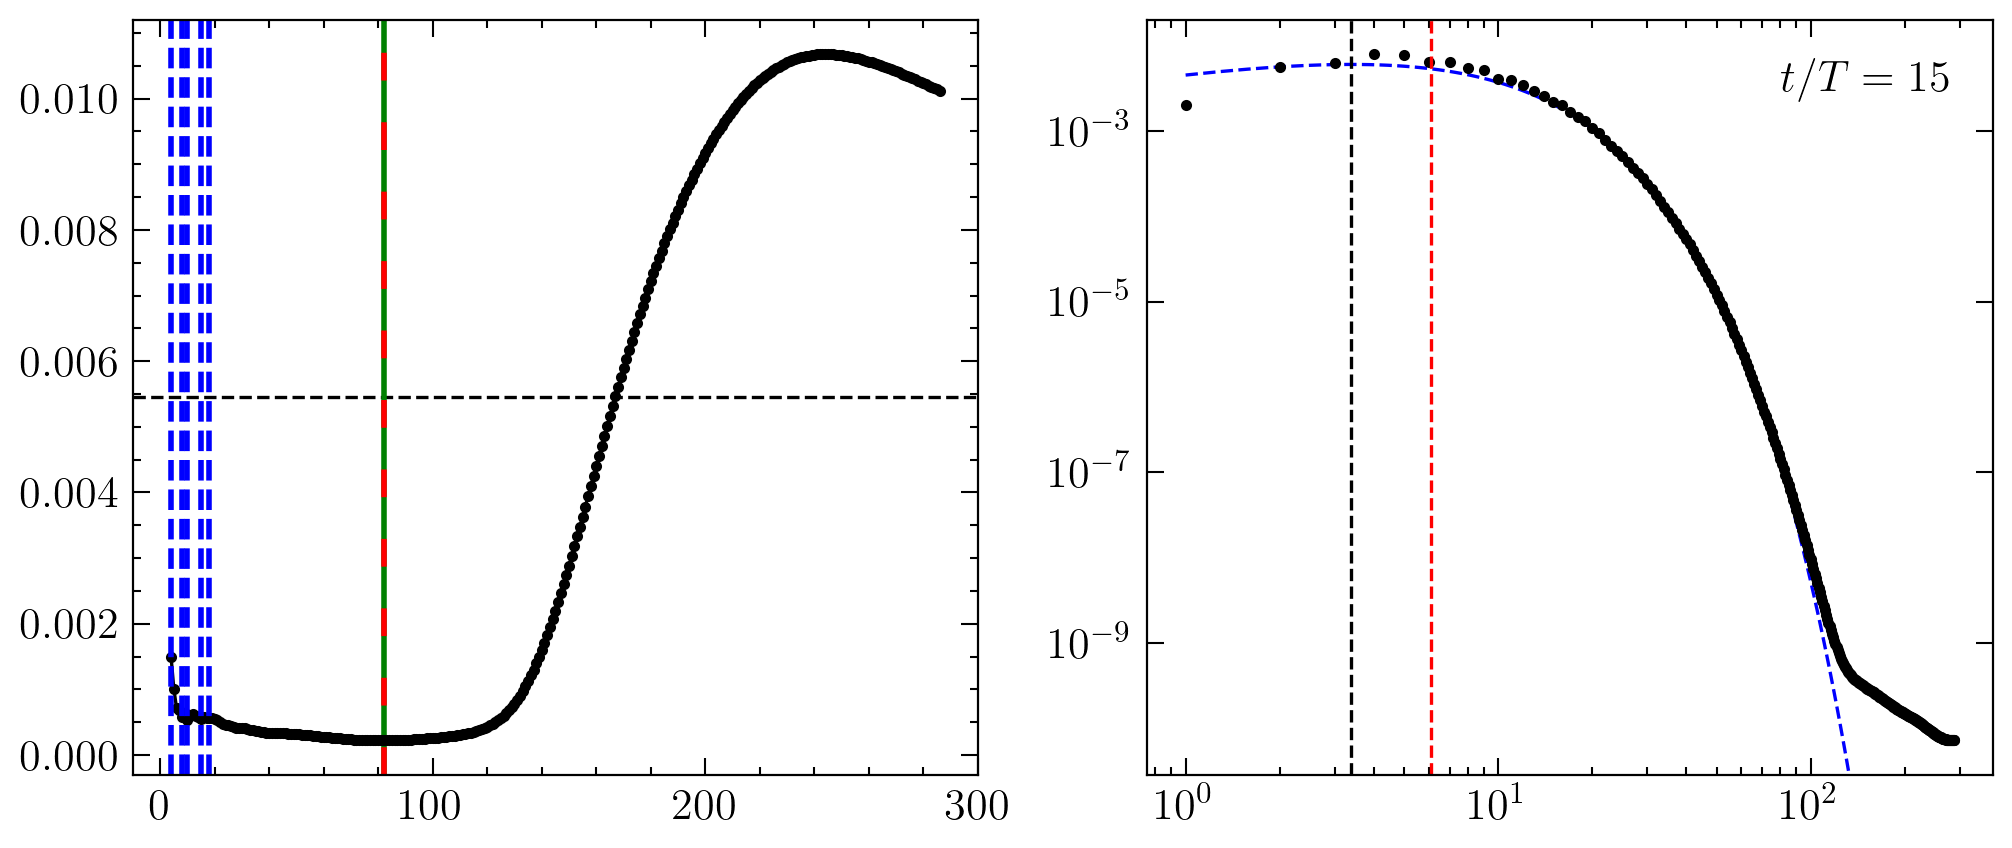

k_scale: 7.484366604480614


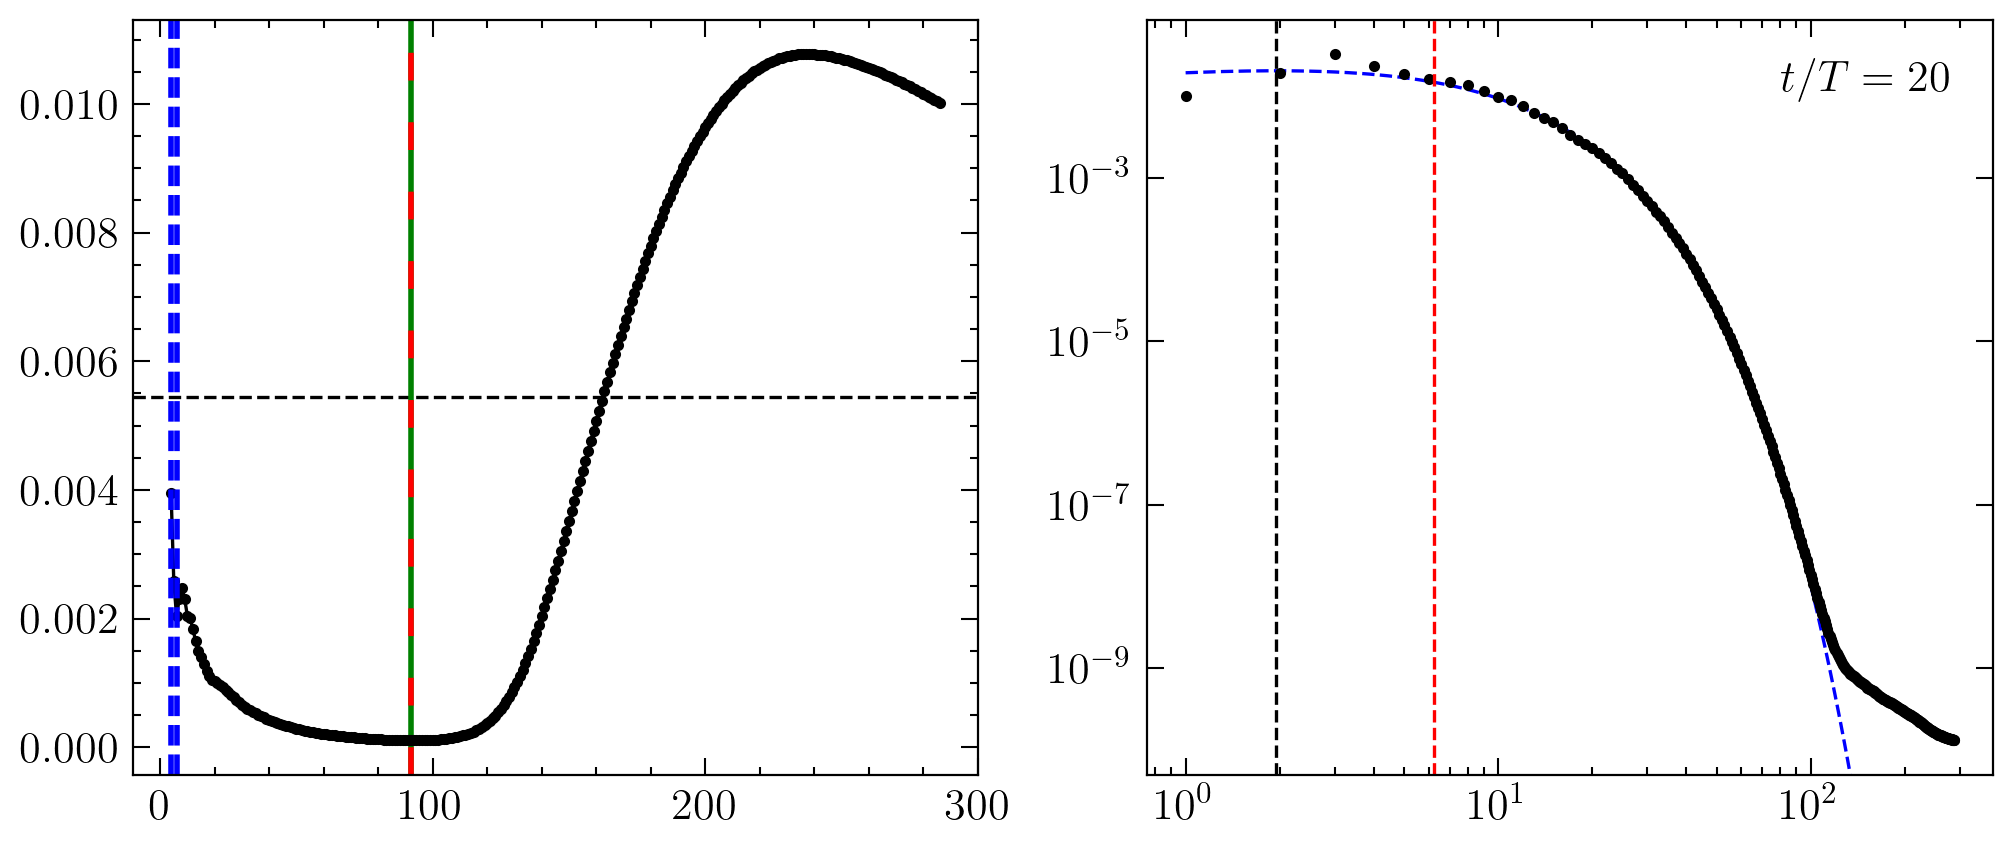

In [9]:
## load simulation's spectra object
filepath_base = "/Users/dukekriel/Documents/Projects/Turbulent-Dynamo/data/fixed_Rm/576/"
filepath_data = createFilePath([filepath_base, "Pm2"])
## if the file exists, then read it in
filename = createFilePath([filepath_data, "spectra_obj.pkl"])
if os.path.isfile(filename): 
    with open(filename, "rb") as input:
        spectra_obj = pickle.load(input)
else: raise Exception("\t\t> No spectra object found.")

# list_fit_times = list(np.linspace(5, 15, 10))
for fit_time in [2, 5, 10, 15, 20]:
    ## get fit index associated with the target time
    fit_index = getIndexClosestValue(spectra_obj.mag_sim_times, fit_time)
    ## get data
    fit_num_points = spectra_obj.mag_list_fit_num_points[fit_index]
    fit_errors     = spectra_obj.mag_list_fit_errors[fit_index]
    ## find minima
    list_minima_index = [0]
    list_minima_index.extend(list( argrelextrema(np.array(fit_errors), np.less)[0] ))
    ## define error cut-off
    maximum_error = 0.5 * (max(fit_errors) + min(fit_errors))
    ## if there are many minima
    if len(list_minima_index) > 1:
        ## find those that occur before the maximum error
        list_minima_early = [
            minima_index for minima_index in list_minima_index
            if fit_errors[minima_index] < maximum_error
        ]
        ## if there are minima before the maximum error, then use it
        if len(list_minima_early) > 0:
            best_fit_index = list_minima_early[-1]
        ## if there are no minima before the maximum error, then choose the last minima
        else: best_fit_index = list_minima_index[-1]
    ## if there is only one minima, then use it
    elif len(list_minima_index) == 1:
        best_fit_index = list_minima_index[0]
    ## otherwise if there is no minima, then choose the number of points associated with the smallest error
    else: best_fit_index = getIndexListMin(fit_errors)[1]

    ## initialise figure
    fig_scales = plt.figure(figsize=(12, 5))
    fig_grids = GridSpec(ncols=2, nrows=1, figure=fig_scales)
    ax0 = fig_scales.add_subplot(fig_grids[0])
    ax1 = fig_scales.add_subplot(fig_grids[1])

    ## ########################
    ## LEFT PLOT
    ## #########
    ax0.axhline(y=maximum_error, ls="--", color="k")
    ## plot the best fit used
    ax0.axvline(x=spectra_obj.mag_fit_num_points[fit_index], ls="-", color="g", lw=2)
    ## plot data
    ax0.plot(fit_num_points, fit_errors, "k.")
    ax0.plot(fit_num_points, fit_errors, "k-")
    ## plot minima
    for minima_index in list_minima_index:
        bool_last_minima = ( fit_num_points[minima_index] == fit_num_points[list_minima_index[-1]] )
        bool_used_minima = ( fit_num_points[minima_index] == spectra_obj.mag_fit_num_points[fit_index] )
        if bool_last_minima or bool_used_minima: continue
        ax0.axvline(x=fit_num_points[minima_index], ls="--", color="b", lw=2)
    ## plot the new best fit
    ax0.axvline(x=fit_num_points[best_fit_index], ls="--", dashes=(5, 7.5), color="r", lw=2)

    ## ########################
    ## RIGHT PLOT
    ## ##########
    ## plot spectra
    ax1.plot(spectra_obj.vel_k[fit_index], spectra_obj.mag_power[fit_index], "k.")
    ## plot spectra fit
    fitted_line = [
        np.column_stack((
            spectra_obj.mag_fit_k[fit_index],
            spectra_obj.mag_fit_power[fit_index]
        ))
    ]
    ax1.add_collection(
        LineCollection(fitted_line, linestyle="--", color='blue'),
        autolim = False # ignore these points when setting the axis limits
    )
    ## plot measured scales
    ax1.axvline(x=spectra_obj.k_eta[fit_index], ls="--", color="red")
    ax1.axvline(x=spectra_obj.k_max[fit_index], ls="--", color="black")
    ## scaling axis
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ## add time label
    ax1.text(
        0.95, 0.95, r"$t / T = {}$".format(str(fit_time)),
        va="top", ha="right", transform=ax1.transAxes, fontsize=16
    )

    print("k_scale:", spectra_obj.k_nu[fit_index])
    ## show figure
    plt.show()

local minima: [-9.49367089 -8.73417722 -7.21518987 -6.70886076 -5.44303797 -3.67088608
 -2.91139241 -1.13924051 -0.63291139  1.89873418  2.40506329  3.67088608
  4.43037975  5.44303797  7.21518987  7.97468354  8.48101266]


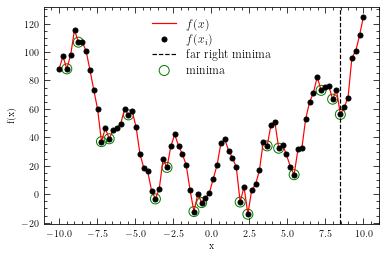

In [15]:
## define function
def f(x): return x**2 + 20*np.sin(2*x)

## #################
## GENERATE DATA
num_points = 80
noise      = 20*rand(num_points)
x          = np.linspace(-10, 10, num_points)
y          = f(x) + noise
## find minima
index_minima = getIndexLocalMinima(y)
x_minima = x[index_minima]
y_minima = y[index_minima]

## #################
## PLOT DATA
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
## plot the function
ax.plot(x, y, 'r-', label=r"$f(x)$")
ax.plot(x, y, 'k.', label=r"$f(x_i)$", markersize=10)
## plot function minima
ax.scatter(x_minima, y_minima, marker='o', s=100, facecolors='none', edgecolors='g', label="minima")
ax.axvline(x=x_minima[-1], ls="--", color="k", label="far right minima")
## label plot
ax.legend(loc='best', fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

print( "local minima:", x_minima )
plt.show()

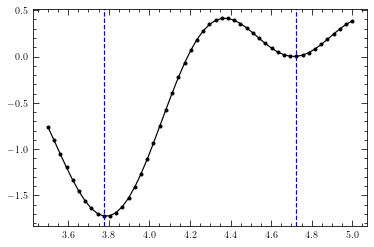

In [13]:
from scipy.signal import argrelextrema

x = np.linspace(3.5, 5, 50)
y = np.sin(x) * np.sin(2*x) * np.sin(3*x) * 4*np.cos(x)

list_minima_index = argrelextrema(y, np.less)[0]

plt.plot(x, y, "k.")
plt.plot(x, y, "k-")
for minima_index in list_minima_index:
    plt.axvline(x=x[minima_index], ls="--", color="b")
plt.show()